# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plotter
import glob 
import tensorflow as tf
import keras 
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalAveragePooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from PIL import Image
from sklearn.utils import shuffle
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from keras.layers import Input, Dense, Activation, Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras import applications

import warnings


warnings.filterwarnings('ignore')

2024-04-10 16:26:22.055539: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-10 16:26:22.055642: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-10 16:26:22.171391: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## Read fire images

In [2]:
fire1_data='//kaggle/input/forest-fire/train_fire'
df1 = pd.DataFrame(os.listdir(fire1_data),columns=['Files_Name'])
df1['image_path'] = fire1_data + '/' + df1['Files_Name']

fire2_data='//kaggle/input/cyclone-wildfire-flood-earthquake-database/Cyclone_Wildfire_Flood_Earthquake_Database/Cyclone_Wildfire_Flood_Earthquake_Database/Wildfire'
df2 = pd.DataFrame(os.listdir(fire2_data),columns=['Files_Name'])
df2['image_path'] = fire2_data + '/' + df2['Files_Name']

fire3_data='//kaggle/input/forest-fire-smoke-and-non-fire-image-dataset/FOREST_FIRE_SMOKE_AND_NON_FIRE_DATASET/train/fire'
df3 = pd.DataFrame(os.listdir(fire3_data),columns=['Files_Name'])
df3['image_path'] = fire3_data + '/' + df3['Files_Name']

fire4_data='//kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/fire'
df4 = pd.DataFrame(os.listdir(fire4_data),columns=['Files_Name'])
df4['image_path'] = fire4_data + '/' + df4['Files_Name']

fire5_data='//kaggle/input/wildfire-surveillance/Fire_imgs/Fire_imgs'
df5 = pd.DataFrame(os.listdir(fire5_data),columns=['Files_Name'])
df5['image_path'] = fire5_data + '/' + df5['Files_Name']


In [3]:
df1

,Files_Name,image_path
0,fire-6633.93338809.png,//kaggle/input/forest-fire/train_fire/fire-663...
1,fire-9610.33661017.png,//kaggle/input/forest-fire/train_fire/fire-961...
2,fire-3773.87514109.png,//kaggle/input/forest-fire/train_fire/fire-377...
3,fire-4908.01249205.png,//kaggle/input/forest-fire/train_fire/fire-490...
4,fire-675.963945006.png,//kaggle/input/forest-fire/train_fire/fire-675...
...,...,...
1097,fire-4366.4140555.png,//kaggle/input/forest-fire/train_fire/fire-436...
1098,fire-9299.63752718.png,//kaggle/input/forest-fire/train_fire/fire-929...
1099,fire-4792.47060967.png,//kaggle/input/forest-fire/train_fire/fire-479...
1100,fire-7026.83870926.png,//kaggle/input/forest-fire/train_fire/fire-702...


In [4]:
df2

,Files_Name,image_path
0,623.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
1,764.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
2,1075.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
3,771.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
4,208.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
...,...,...
1072,599.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
1073,25.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
1074,147.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...
1075,921.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...


In [5]:
df3

,Files_Name,image_path
0,Fire (1366).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...
1,Fire (72).jpeg,//kaggle/input/forest-fire-smoke-and-non-fire-...
2,Fire (79).png,//kaggle/input/forest-fire-smoke-and-non-fire-...
3,Fire (2334).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...
4,Fire (4687).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...
...,...,...
10795,Fire (6028).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...
10796,Fire (4959).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...
10797,Fire (2362).png,//kaggle/input/forest-fire-smoke-and-non-fire-...
10798,Fire (2063).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...


In [6]:
df4

,Files_Name,image_path
0,50323801727_aa1f463c63_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
1,51592667486_0cdd5ea63f_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
2,51234131611_f593a97b57_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
3,7866653824_b0569ba0a0_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
4,9570750563_5eed034f27_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
...,...,...
725,50379969133_97eb4b3e97_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
726,21450338211_5e5932e711_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
727,52148619336_a5616a7a72_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
728,11876298944_d12f714d39_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...


In [7]:
df5

,Files_Name,image_path
0,raw_54h.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
1,fire_0341.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
2,raw_522x.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
3,raw_264j.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
4,raw_122x.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
...,...,...
2575,raw_544x.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
2576,fire_0702.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
2577,raw_142v.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...
2578,fire_0854.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...


In [3]:
merged_fire_df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
merged_fire_df['Category'] = 'Fire'
merged_fire_df=merged_fire_df.drop(merged_fire_df.sample(n=1039).index)
merged_fire_df

,Files_Name,image_path,Category
0,fire-6633.93338809.png,//kaggle/input/forest-fire/train_fire/fire-663...,Fire
1,fire-9610.33661017.png,//kaggle/input/forest-fire/train_fire/fire-961...,Fire
3,fire-4908.01249205.png,//kaggle/input/forest-fire/train_fire/fire-490...,Fire
6,fire-9296.37752477.png,//kaggle/input/forest-fire/train_fire/fire-929...,Fire
7,fire-6112.55392738.png,//kaggle/input/forest-fire/train_fire/fire-611...,Fire
...,...,...,...
16283,fire_0486.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...,Fire
16284,raw_544x.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...,Fire
16285,fire_0702.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...,Fire
16286,raw_142v.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...,Fire


## Read Normal Images

In [8]:
normal_data='//kaggle/input/the-wildfire-dataset/the_wildfire_dataset_2n_version/train/nofire'
df1 = pd.DataFrame(os.listdir(normal_data),columns=['Files_Name'])
df1['image_path'] = normal_data + '/' + df1['Files_Name']

normal_data='//kaggle/input/fire-images-database/wild/notFlames'
df2 = pd.DataFrame(os.listdir(normal_data),columns=['Files_Name'])
df2['image_path'] = normal_data + '/' + df2['Files_Name']

normal_data='//kaggle/input/forest-fire-image-dataset/FOREST_FIRE_DATASET/NON_FIRE'
df3 = pd.DataFrame(os.listdir(normal_data),columns=['Files_Name'])
df3['image_path'] = normal_data + '/' + df3['Files_Name']

normal_data='//kaggle/input/wildfire-surveillance/NoFire_imgs/NoFire_imgs'
df4 = pd.DataFrame(os.listdir(normal_data),columns=['Files_Name'])
df4['image_path'] = normal_data + '/' + df4['Files_Name']

In [9]:
df1

,Files_Name,image_path
0,maciek-sulkowski-oCmOCNGJM1g-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
1,bobby-stevenson-Bi8vaFCoaNM-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
2,ozark-drones-H1psDNcpOfI-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
3,cristina-gottardi-ahzgaalmLYY-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
4,mads-schmidt-rasmussen-6YmzwamGzCg-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
...,...,...
1152,pascal-scholl-tCXtTfJTR6E-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
1153,casey-horner-OlMAWilgnvY-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
1154,clement-m-h7vKkZNNThE-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...
1155,john-towner-TCCCKgdFmBo-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...


In [10]:
df2

,Files_Name,image_path
0,6015816000.jpg,//kaggle/input/fire-images-database/wild/notFl...
1,3810628325.jpg,//kaggle/input/fire-images-database/wild/notFl...
2,6157410504.jpg,//kaggle/input/fire-images-database/wild/notFl...
3,5808491015.jpg,//kaggle/input/fire-images-database/wild/notFl...
4,13480667874.jpg,//kaggle/input/fire-images-database/wild/notFl...
...,...,...
3947,8114994288.jpg,//kaggle/input/fire-images-database/wild/notFl...
3948,4747425582.jpg,//kaggle/input/fire-images-database/wild/notFl...
3949,4115253992.jpg,//kaggle/input/fire-images-database/wild/notFl...
3950,7787421884.jpg,//kaggle/input/fire-images-database/wild/notFl...


In [11]:
df3

,Files_Name,image_path
0,NON_FIRE (3195).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
1,08450.jpg,//kaggle/input/forest-fire-image-dataset/FORES...
2,NON_FIRE (893).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
3,NON_FIRE (332).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
4,NON_FIRE (3064).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
...,...,...
7134,NON_FIRE (2739).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
7135,NON_FIRE (811).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
7136,NON_FIRE (2033).jpg,//kaggle/input/forest-fire-image-dataset/FORES...
7137,NON_FIRE (5328).jpg,//kaggle/input/forest-fire-image-dataset/FORES...


In [12]:
df4

,Files_Name,image_path
0,raw_218a.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
1,raw_148a.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
2,raw_1984c.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
3,nofire_0324.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
4,raw_216d.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
...,...,...
4845,raw_174b.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
4846,raw_1104c.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
4847,raw_3406c.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...
4848,raw_1606e.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...


In [13]:
merged_normal_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
merged_normal_df['Category'] = 'Normal'
merged_normal_df=merged_normal_df.drop(merged_normal_df.sample(n=1848).index)
merged_normal_df

,Files_Name,image_path,Category
0,maciek-sulkowski-oCmOCNGJM1g-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...,Normal
1,bobby-stevenson-Bi8vaFCoaNM-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...,Normal
2,ozark-drones-H1psDNcpOfI-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...,Normal
3,cristina-gottardi-ahzgaalmLYY-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...,Normal
4,mads-schmidt-rasmussen-6YmzwamGzCg-unsplash.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...,Normal
...,...,...,...
17090,raw_2208e.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
17091,raw_1702e.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
17094,raw_1104c.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
17095,raw_3406c.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal


## Read Accident Images

In [14]:
acc_data='//kaggle/input/accidentsdataset/AccidentsDataset/Traffic_augmented_images'
df1 = pd.DataFrame(os.listdir(acc_data),columns=['Files_Name'])
df1['image_path'] = acc_data + '/' + df1['Files_Name']

acc_data='//kaggle/input/accidentsdataset/AccidentsDataset/Traffic_incident'
df2 = pd.DataFrame(os.listdir(acc_data),columns=['Files_Name'])
df2['image_path'] = acc_data + '/' + df2['Files_Name']

acc_data='//kaggle/input/accidentsdataset/AccidentsDataset/accident'
df3 = pd.DataFrame(os.listdir(acc_data),columns=['Files_Name'])
df3['image_path'] = acc_data + '/' + df3['Files_Name']

acc_data='//kaggle/input/accidentsdataset/AccidentsDataset/accident_multiple'
df4 = pd.DataFrame(os.listdir(acc_data),columns=['Files_Name'])
df4['image_path'] = acc_data + '/' + df4['Files_Name']

In [15]:
df1

,Files_Name,image_path
0,augmented_1329_4.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
1,augmented_345_2.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
2,augmented_1328_4.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
3,augmented_489_4.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
4,augmented_1153_3.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
...,...,...
13845,augmented_40_3.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
13846,augmented_804_6.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
13847,augmented_949_0.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
13848,augmented_295_9.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...


In [16]:
df2

,Files_Name,image_path
0,traffic_incident_image0022.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
1,traffic_incident_image0212.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
2,traffic_incident_image0091.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
3,traffic_incident_image0190.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
4,traffic_incident_image0254.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
...,...,...
480,traffic_incident_image0473.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
481,traffic_incident_image0209.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
482,traffic_incident_image0396.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...
483,traffic_incident_image0152.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...


In [17]:
df3

,Files_Name,image_path
0,2accidentFrame1211_jpg.rf.169bee01ee4530f0e668...,//kaggle/input/accidentsdataset/AccidentsDatas...
1,test16_22_jpg.rf.f215097062bbac4a830491aa81893...,//kaggle/input/accidentsdataset/AccidentsDatas...
2,severity_V111_jpg.rf.3fc0467e9a074eb3d44a64884...,//kaggle/input/accidentsdataset/AccidentsDatas...
3,test27_16_jpg.rf.10a61a09e87b0cc7ba3f8d70c7805...,//kaggle/input/accidentsdataset/AccidentsDatas...
4,images-11_jpg.rf.dce3693fff6758829c3f89920fbdf...,//kaggle/input/accidentsdataset/AccidentsDatas...
...,...,...
1615,accidentFrame37_jpg.rf.c782699ccac324e88f41c1f...,//kaggle/input/accidentsdataset/AccidentsDatas...
1616,frame_0773_jpg.rf.06aabcb409c0ba252bf8a95897da...,//kaggle/input/accidentsdataset/AccidentsDatas...
1617,severityV4_58_jpg.rf.e52171b254122a0f91ca3e208...,//kaggle/input/accidentsdataset/AccidentsDatas...
1618,accidentFrame4486_jpg.rf.e816173ec0a459ebdae0b...,//kaggle/input/accidentsdataset/AccidentsDatas...


In [18]:
df4

,Files_Name,image_path
0,trafficseverity_img4839_jpg.rf.04fa5bb01269858...,//kaggle/input/accidentsdataset/AccidentsDatas...
1,severityV2_2_jpg.rf.0bdc4d35a93c4a65e63e43afe6...,//kaggle/input/accidentsdataset/AccidentsDatas...
2,SEV_22_2970_jpg.rf.bcf6bee9c622d713fd7c860092e...,//kaggle/input/accidentsdataset/AccidentsDatas...
3,acc1340_jpg.rf.d0e4fef338efad4cb6dfb0fd86f1ce9...,//kaggle/input/accidentsdataset/AccidentsDatas...
4,images_548_jpg.rf.d70d4a5838b1441862525d453cef...,//kaggle/input/accidentsdataset/AccidentsDatas...
5,zrbf_frame7_jpg.rf.cf00fdcbcf926716e94107fe435...,//kaggle/input/accidentsdataset/AccidentsDatas...
6,accidentFrame10946_jpg.rf.8e78b2bf8ab2142dfcb9...,//kaggle/input/accidentsdataset/AccidentsDatas...
7,Bus-Truck-Crashes-10-BeamNG-Drive_i_frame_1766...,//kaggle/input/accidentsdataset/AccidentsDatas...
8,severityV4_35_jpg.rf.ac8a4b1db7dfb1d273e30be76...,//kaggle/input/accidentsdataset/AccidentsDatas...
9,images_548_jpg.rf.a7aeea82c8731d69e047414bcd38...,//kaggle/input/accidentsdataset/AccidentsDatas...


In [19]:
merged_acc_df = pd.concat([df1, df2, df3, df4], ignore_index=True)
merged_acc_df['Category'] = 'Accident'
merged_acc_df=merged_acc_df.drop(merged_acc_df.sample(n=761).index)
merged_acc_df

,Files_Name,image_path,Category
0,augmented_1329_4.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
1,augmented_345_2.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
2,augmented_1328_4.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
3,augmented_489_4.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
4,augmented_1153_3.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
...,...,...,...
16006,trafficseverity_img358_jpg.rf.b94f226ae9fb31b3...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
16007,images_402-3-_jpg.rf.7280bd870afae3a4f8a51fae4...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
16008,accidentFrame2754_jpg.rf.4af7a1a6bf7ad6d339ac5...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
16009,trafficseverity_img360_jpg.rf.735aa10b1d3656f2...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident


# reading the new db dataset

In [20]:
db_data='//kaggle/input/damaged-buildings-dataset/DamadgedBuildingsDataset/Aug_db'
df1 = pd.DataFrame(os.listdir(db_data),columns=['Files_Name'])
df1['image_path'] = db_data + '/' + df1['Files_Name']

db_data='//kaggle/input/damaged-buildings-dataset/DamadgedBuildingsDataset/db'
df2 = pd.DataFrame(os.listdir(db_data),columns=['Files_Name'])
df2['image_path'] = db_data + '/' + df2['Files_Name']

db_data='//kaggle/input/damaged-buildings-dataset/DamadgedBuildingsDataset/db2'
df3 = pd.DataFrame(os.listdir(db_data),columns=['Files_Name'])
df3['image_path'] = db_data + '/' + df3['Files_Name']

In [21]:
df1

,Files_Name,image_path
0,augmented_571_0.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
1,augmented_1599_0.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
2,augmented_22_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
3,augmented_1813_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
4,augmented_1411_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
...,...,...
4159,augmented_92_0.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
4160,augmented_265_0.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
4161,augmented_625_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
4162,augmented_694_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...


In [22]:
df2

,Files_Name,image_path
0,13288.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
1,1269.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
2,623.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
3,11925.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
4,11378.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
...,...,...
5451,13877.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
5452,11205.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
5453,921.jpg,//kaggle/input/damaged-buildings-dataset/Damad...
5454,728.jpg,//kaggle/input/damaged-buildings-dataset/Damad...


In [23]:
df3

,Files_Name,image_path
0,1 (2916).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
1,1 (607).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
2,1 (3767).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
3,1 (576).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
4,1 (1856).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
...,...,...
5625,1 (2628).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
5626,1 (2630).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
5627,1 (1742).jpg,//kaggle/input/damaged-buildings-dataset/Damad...
5628,1 (3558).jpg,//kaggle/input/damaged-buildings-dataset/Damad...


In [24]:
merged_db_df = pd.concat([df1, df2, df3], ignore_index=True)
merged_db_df['Category'] = 'Damadged Buildings'
merged_db_df

,Files_Name,image_path,Category
0,augmented_571_0.jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
1,augmented_1599_0.jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
2,augmented_22_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
3,augmented_1813_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
4,augmented_1411_1.jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
...,...,...,...
15245,1 (2628).jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
15246,1 (2630).jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
15247,1 (1742).jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
15248,1 (3558).jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings


# Merging Dataframes
* Fire
* Accidents
* Normal
* Damadged Buildings

In [25]:
final_df = pd.concat([merged_fire_df, merged_acc_df, merged_normal_df
                      , merged_db_df
                     ], ignore_index=True)
final_df

NameError: name 'merged_fire_df' is not defined

# Visualization

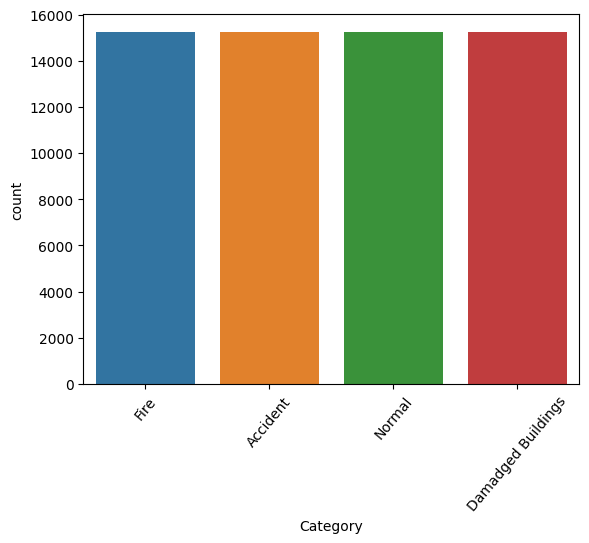

In [11]:
sns.countplot(x = final_df["Category"])
plotter.xticks(rotation = 50);

# Train, Test Split

In [12]:
train_df, test_df = train_test_split(final_df, train_size=0.7, shuffle=True, random_state=1)

In [13]:
train_df

,Files_Name,image_path,Category
41923,raw_506e.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
1638,277.jpg,//kaggle/input/cyclone-wildfire-flood-earthqua...,Fire
43928,nofire_0326.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
29862,9k_-8-_jpg.rf.e577b56e9d776e442034e3795ddf2c0f...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
19916,augmented_887_0.jpg,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
...,...,...,...
50057,521.jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings
32511,14759890686.jpg,//kaggle/input/fire-images-database/wild/notFl...,Normal
5192,Fire (7395).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...,Fire
12172,52528603574_c4306b169a_o.jpg,//kaggle/input/the-wildfire-dataset/the_wildfi...,Fire


In [14]:
test_df

,Files_Name,image_path,Category
30120,SEV_22_2948_jpg.rf.2ed7b69e17a2f2712e34ab76d20...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
41582,raw_1470c.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
2787,Fire (1630).jpg,//kaggle/input/forest-fire-smoke-and-non-fire-...,Fire
44182,raw_314b.jpg,//kaggle/input/wildfire-surveillance/NoFire_im...,Normal
36695,NON_FIRE (990).jpg,//kaggle/input/forest-fire-image-dataset/FORES...,Normal
...,...,...,...
14655,fire_0665.jpg,//kaggle/input/wildfire-surveillance/Fire_imgs...,Fire
40724,NON_FIRE (820).jpg,//kaggle/input/forest-fire-image-dataset/FORES...,Normal
29647,traffic_img953_jpg.rf.14a30a5de3b382e18eadc550...,//kaggle/input/accidentsdataset/AccidentsDatas...,Accident
58116,1 (2130).jpg,//kaggle/input/damaged-buildings-dataset/Damad...,Damadged Buildings


In [15]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.convnext.preprocess_input,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    preprocessing_function=tf.keras.applications.convnext.preprocess_input)

In [16]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='Category',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='image_path',
    y_col='Category',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='image_path',
    y_col='Category',
    target_size=(224, 224),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=128,
    shuffle=False
)

Found 34159 validated image filenames belonging to 4 classes.
Found 8539 validated image filenames belonging to 4 classes.
Found 18300 validated image filenames belonging to 4 classes.


## ConvNeXtXLarge

In [17]:
pretrained_model = tf.keras.applications.ConvNeXtXLarge(
                    input_shape=(224, 224, 3),
                    include_top=False,
                    weights='imagenet',
                    pooling='avg')
pretrained_model.trainable = False

1393257616/1393257616 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [18]:
inputs = pretrained_model.input
x = tf.keras.layers.Dense(64, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(4, activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
# print(model.summary())

In [19]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [20]:
early_stop_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, min_delta=0.001, verbose=1)

checkpoint_path = "model_checkpoint.keras"
checkpoint_callback = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1)

history = model.fit(train_images, validation_data=val_images, epochs=100,
    callbacks=[early_stop_callback, checkpoint_callback]
                   )

Epoch 1/100


I0000 00:00:1712605160.306836      82 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


187/267 ━━━━━━━━━━━━━━━━━━━━ 3:03 2s/step - accuracy: 0.8934 - loss: 0.2806

W0000 00:00:1712605606.521979      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712605606.522298      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712605606.522704      83 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9104 - loss: 0.2396
Epoch 1: val_loss improved from inf to 0.07281, saving model to model_checkpoint.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 873s 3s/step - accuracy: 0.9106 - loss: 0.2392 - val_accuracy: 0.9754 - val_loss: 0.0728
Epoch 2/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9835 - loss: 0.0532
Epoch 2: val_loss improved from 0.07281 to 0.05817, saving model to model_checkpoint.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 773s 3s/step - accuracy: 0.9835 - loss: 0.0532 - val_accuracy: 0.9796 - val_loss: 0.0582
Epoch 3/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9907 - loss: 0.0349
Epoch 3: val_loss improved from 0.05817 to 0.04940, saving model to model_checkpoint.keras
267/267 ━━━━━━━━━━━━━━━━━━━━ 771s 3s/step - accuracy: 0.9907 - loss: 0.0348 - val_accuracy: 0.9823 - val_loss: 0.0494
Epoch 4/100
267/267 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9945 - loss: 0.0221
Epoch 4: val_loss improved from 0.04940 to 0.

In [21]:
results = model.evaluate(test_images, verbose=0)
print(results)
print(f"Test Accuracy: {np.round(results[1] * 100,2)}%")

[0.03721851855516434, 0.9886338710784912]
Test Accuracy: 98.86%


In [22]:
predictions = np.argmax(model.predict(test_images), axis=1)
matrix = confusion_matrix(test_images.labels, predictions)
report= classification_report(test_images.labels, predictions, target_names=test_images.class_indices, zero_division=0)

143/143 ━━━━━━━━━━━━━━━━━━━━ 329s 2s/step


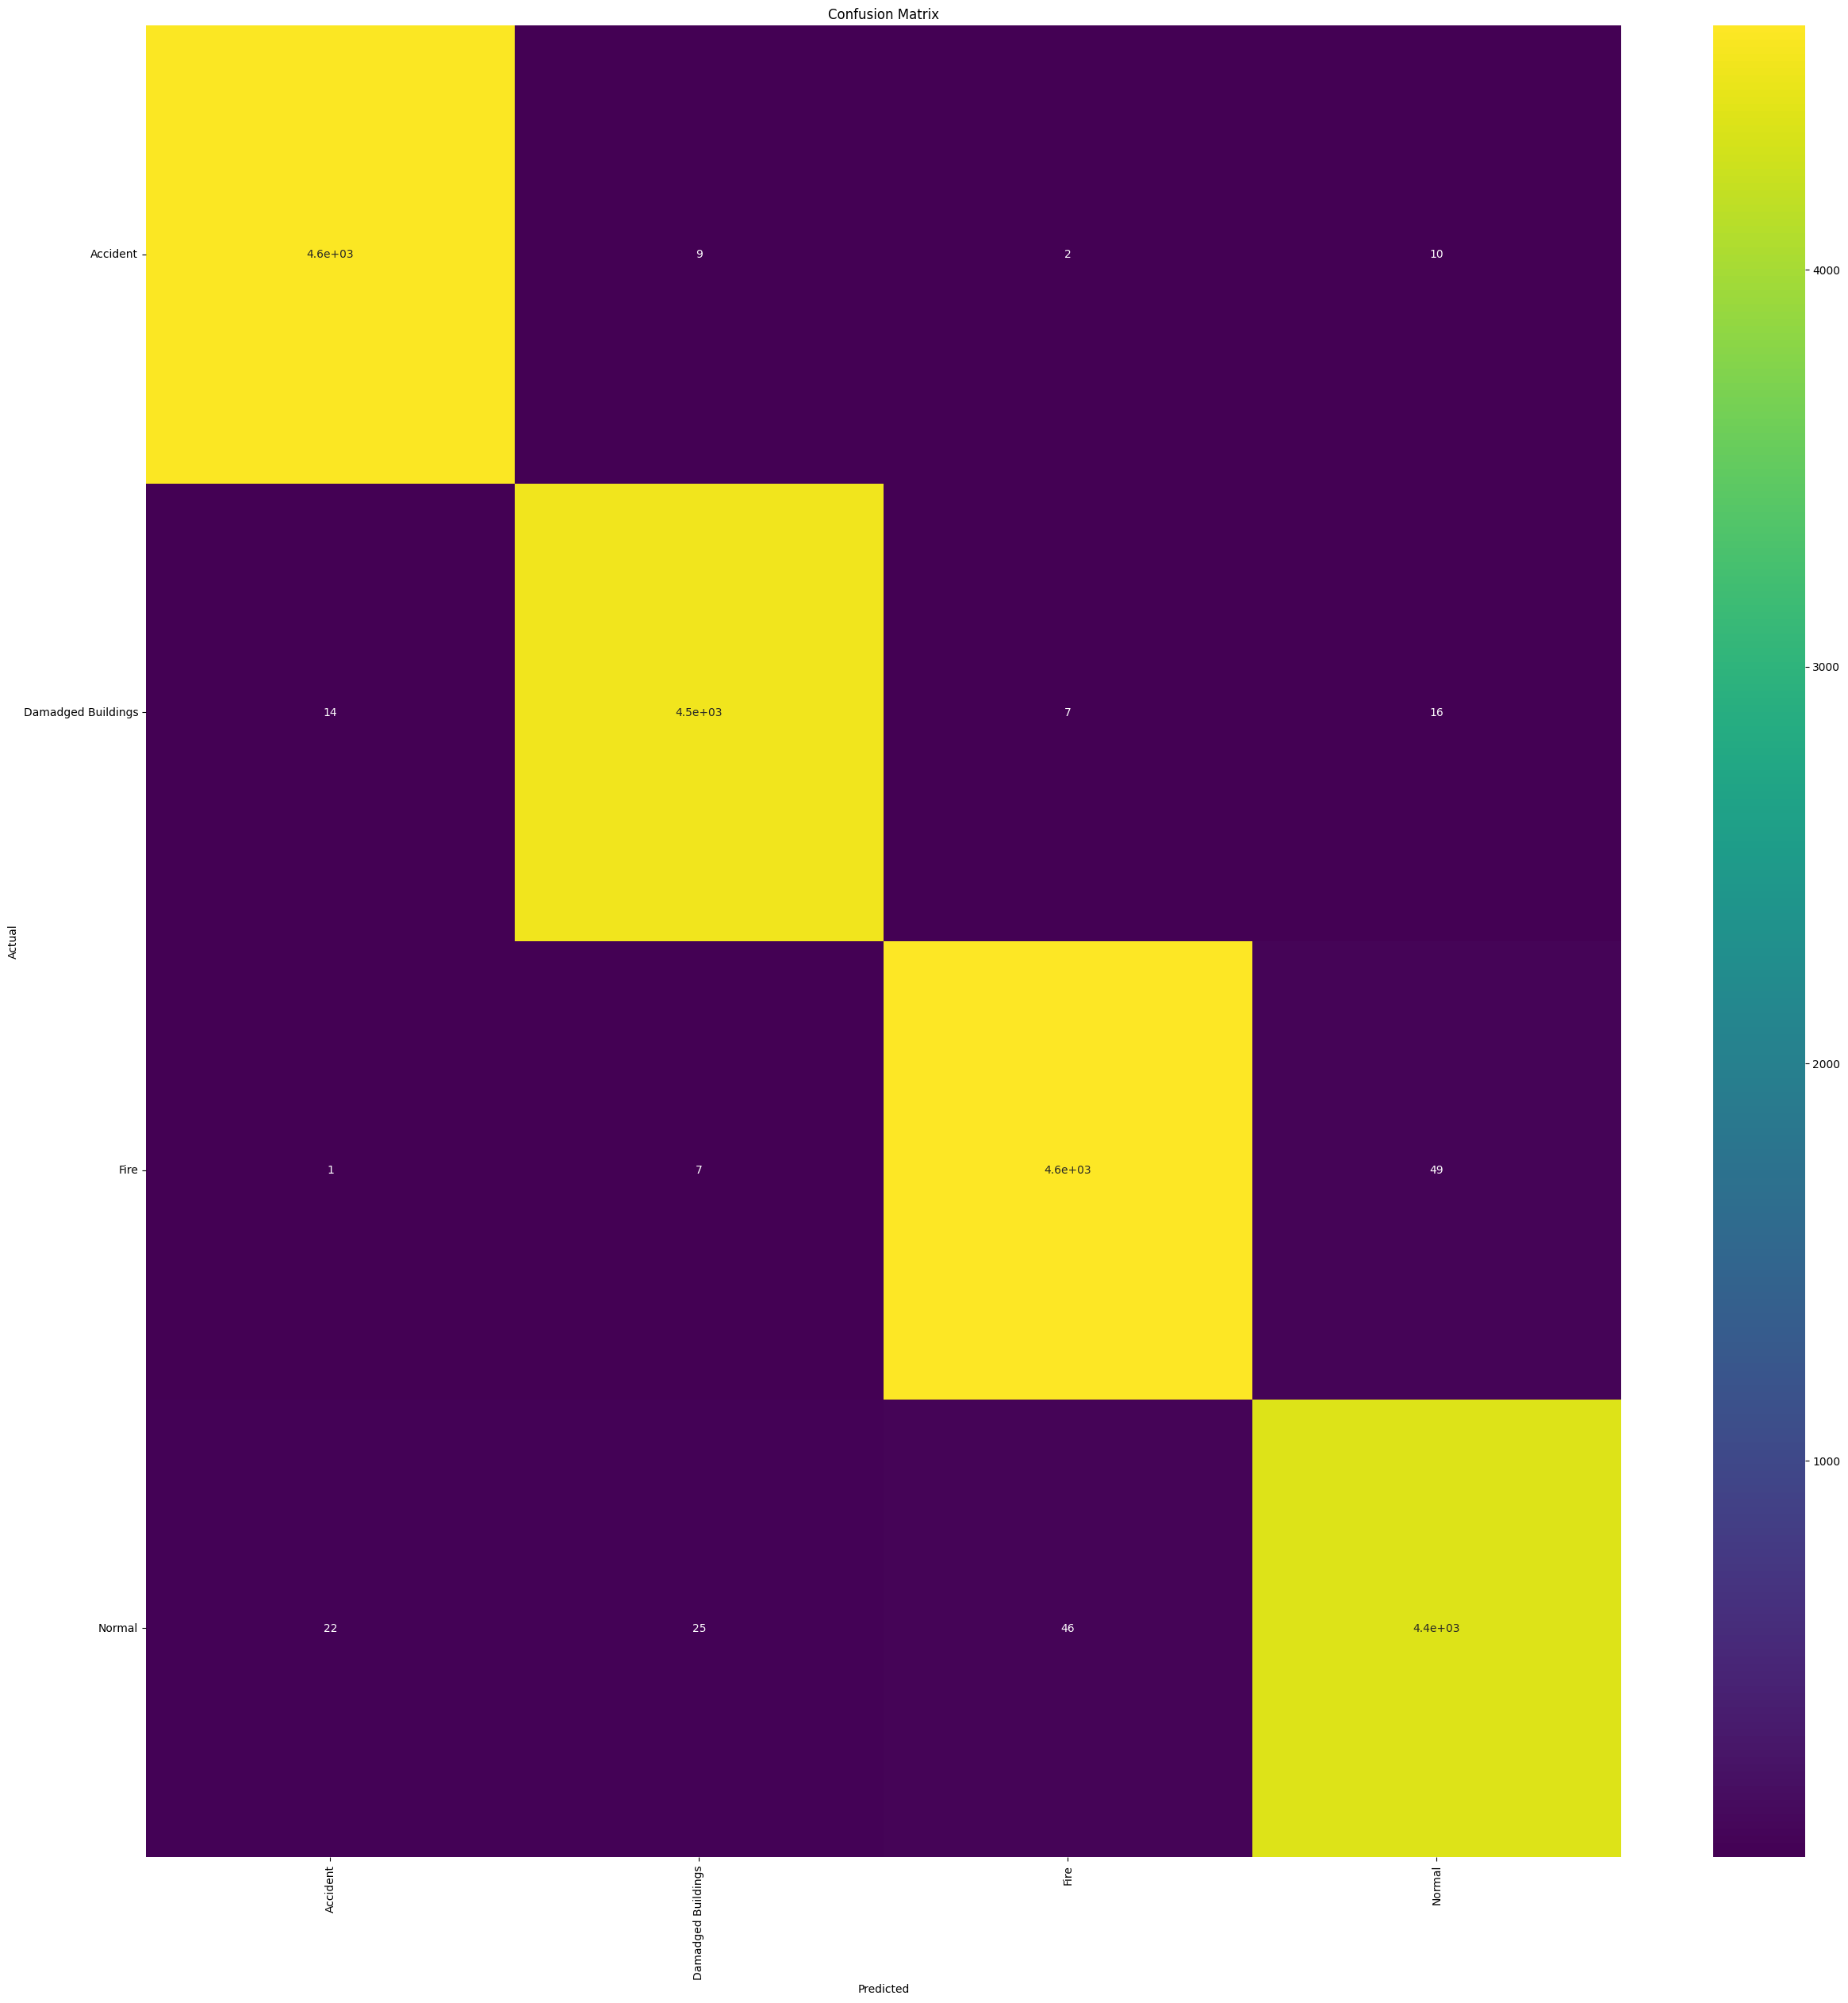

In [23]:
fig = plt.figure(figsize=(30, 30))
sns.heatmap(matrix, annot=True, cmap='viridis')
plt.xticks(ticks=np.arange(4) + 0.5, labels=test_images.class_indices, rotation=90)
plt.yticks(ticks=np.arange(4) + 0.5, labels=test_images.class_indices, rotation=0)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
fig.savefig("Confusion Matrix",dpi=700)

In [24]:
print("Classification Report:\n", report)

Classification Report:
                     precision    recall  f1-score   support

          Accident       0.99      1.00      0.99      4610
Damadged Buildings       0.99      0.99      0.99      4547
              Fire       0.99      0.99      0.99      4672
            Normal       0.98      0.98      0.98      4471

          accuracy                           0.99     18300
         macro avg       0.99      0.99      0.99     18300
      weighted avg       0.99      0.99      0.99     18300



In [25]:
data_his = pd.DataFrame(history.history)
data_his

,accuracy,loss,val_accuracy,val_loss
0,0.954360,0.132908,0.975407,0.072812
1,0.983870,0.050330,0.979623,0.058169
2,0.991422,0.031804,0.982316,0.049402
3,0.994526,0.021632,0.982316,0.046644
4,0.996516,0.015420,0.984542,0.043193
5,0.998331,0.010514,0.985713,0.041299
6,0.998829,0.007897,0.985361,0.042306
7,0.999297,0.005635,0.985478,0.041939
8,0.999619,0.004097,0.986884,0.041614
9,0.999795,0.002917,0.985947,0.043091


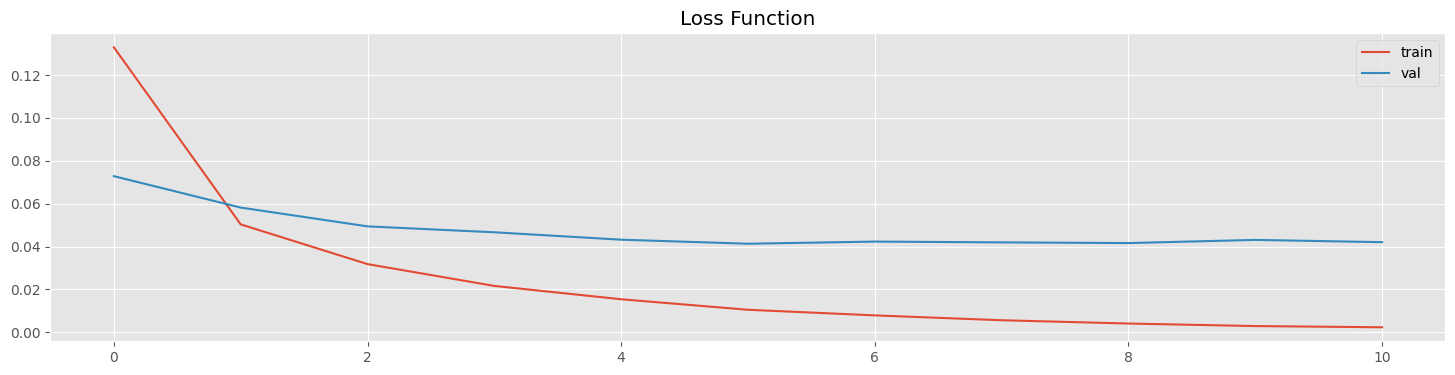

In [26]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['loss'], label = 'train')
plt.plot(data_his['val_loss'], label = 'val')
plt.legend()
plt.title('Loss Function')
plt.show()
fig.savefig("Loss Function",dpi=700)

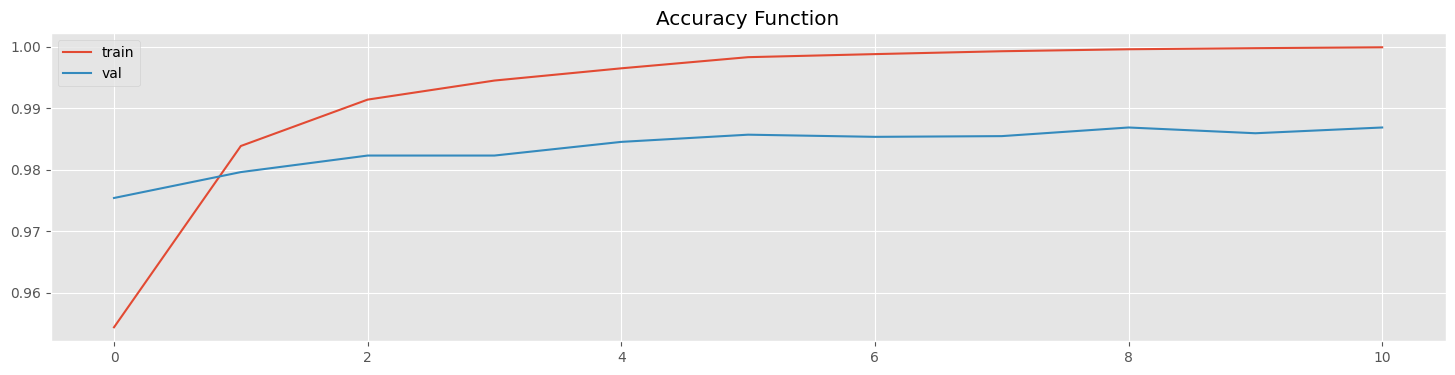

In [27]:
fig = plt.figure(figsize=(18, 4))
plt.plot(data_his['accuracy'], label = 'train')
plt.plot(data_his['val_accuracy'], label = 'val')
plt.legend()
plt.title('Accuracy Function')
plt.show()
fig.savefig("Accuracy Function",dpi=700)